# Predicting sale price of houses

The aim of this project is to build a machine learning model to predict sale price of houses, based on multiple explanatory variables describing aspects of these houses.
The dataset used for this project is available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


# House price prediction : Model building

This notebook is the last step of our project which steps features :
- 1\.  Data analysis
- 2\.  Feature engineering
- 3\.  Feature selection
- **4\.  Model building**

In the following, we will build our model using the engineered variables and the features that we selected in the previous notebook.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from sklearn.linear_model import Lasso


from sklearn.metrics import mean_squared_error, r2_score

import math

In [2]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,...,1.0,0.0,0.545455,0.75,0.666667,0.75,12.211060,0.0,0.0,0.0
1,657,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,...,1.0,0.0,0.636364,0.50,0.666667,0.75,11.887931,0.0,0.0,0.0
2,46,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,...,1.0,0.0,0.090909,1.00,0.666667,0.75,12.675764,0.0,0.0,0.0
3,1349,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,...,1.0,0.0,0.636364,0.25,0.666667,0.75,12.278393,1.0,0.0,0.0
4,56,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,...,1.0,0.0,0.545455,0.50,0.666667,0.75,12.103486,0.0,0.0,0.0


In [3]:
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

In [8]:
features = pd.read_csv('selected_features.csv')

features

,MSSubClass
0,MSZoning
1,Neighborhood
2,OverallQual
3,OverallCond
4,YearRemodAdd
5,RoofStyle
6,MasVnrType
7,BsmtQual
8,BsmtExposure
9,HeatingQC


In [30]:
feats = np.reshape(features.values.tolist(), (features.shape[0], ))

X_train = X_train[feats]
X_test = X_test[feats]

## Regularised linear regression: Lasso

In [32]:
#RANDOM_SEED = 0

lin_model = Lasso(alpha=0.005, random_state=0)


lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
pred = lin_model.predict(X_train)

print("Scores for the train set")
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int( math.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(r2_score(np.exp(y_train), np.exp(pred))))
print("\n")

pred = lin_model.predict(X_test)

print("Scores for the test set")
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('train rmse: {}'.format(int( math.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('train r2: {}'.format(r2_score(np.exp(y_test), np.exp(pred))))
print("\n")

print('Average house price: ', int(np.exp(y_train).median()))

Scores for the train set
train mse: 1095464701
train rmse: 33097
train r2: 0.8245524987165783


Scores for the test set
train mse: 1415749527
train rmse: 37626
train r2: 0.793986353724824


Average house price:  163000


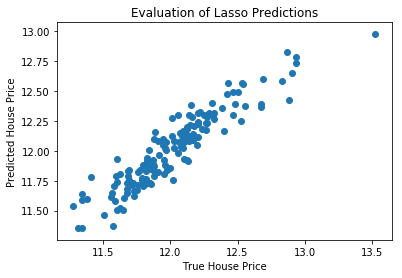

In [37]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')
plt.show()

We can see that our model is doing a pretty good job at estimating house prices.

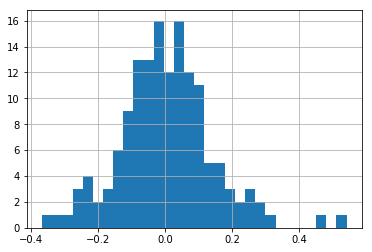

In [38]:
errors = y_test - lin_model.predict(X_test)
errors.hist(bins=30)

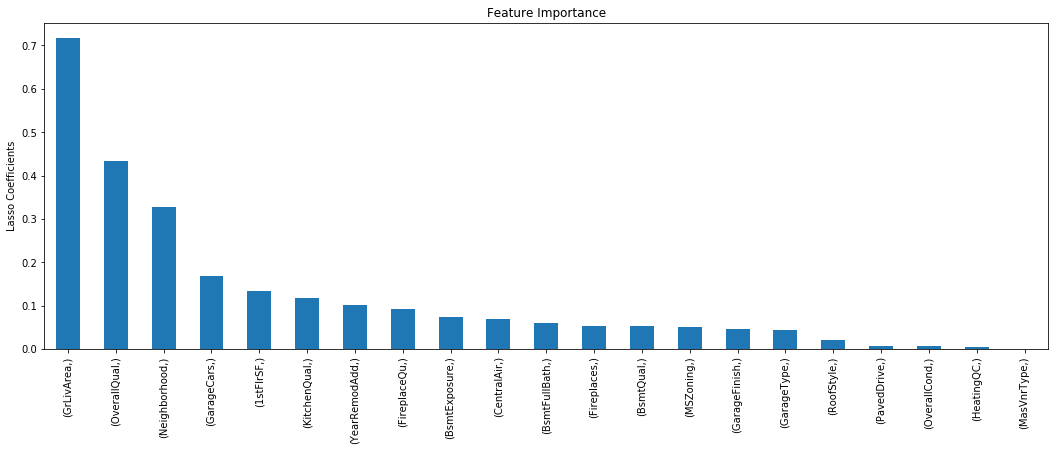

In [40]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

plt.show()